<a href="https://colab.research.google.com/github/marmik10/Terminal-Chat-Application/blob/main/Salary%20Vs%20Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# importing the libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [94]:
class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    # number of training examples & number of features

    self.m, self.n = X.shape  # number of rows & columns

    # initiating the weight and bias 

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights
    
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
 

  def predict(self, X):

    return X.dot(self.w) + self.b

In [95]:
# data Pre-processing

In [96]:
salary_data = pd.read_csv('/content/salary_data.csv')

In [97]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [98]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [99]:
salary_data.shape

(30, 2)

In [100]:
# check for missing value

salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [101]:
# splitting the features and targets

In [102]:
# logistic regression Y = wX + B

X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [103]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [104]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [105]:
# train and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 2)

In [106]:
# Training the linear regression

model = Linear_Regression( learning_rate = 0.02, no_of_iterations = 1000)

In [107]:
model.fit (X_train, Y_train)

In [108]:
# printing the parameters

print ('weight = ', model.w[0])
print ('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


In [109]:
# linear regression formula 
# Y = a + bX

In [110]:
#Prediciting the salary of test data

test_data_prediction = model.predict(X_test)

In [111]:
print (test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


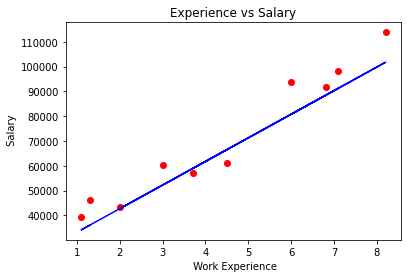

In [112]:
#Visualizing the predicted values and actual values

plt.scatter (X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel(' Work Experience')
plt.ylabel(' Salary')
plt.title('Experience vs Salary')
plt.show()